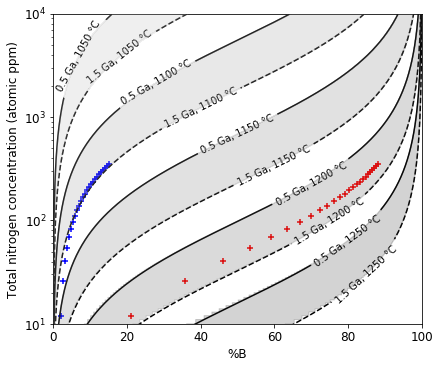

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab #For pylab.rcParams.update(params)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator) #For ticks
params = {'axes.labelsize': 'large', 'axes.titlesize':'large', 'xtick.labelsize':'large', 'ytick.labelsize':'large'} #global settings for labels
pylab.rcParams.update(params) #load global settings for label size
import math #Import for math.exppath ='/Users/meguka/Dropbox/CO2D-project-github/results/tables/' #Path to the data
from pathlib import Path #used for creating an output directory if it doest not exist.
from labellines import labelLine, labelLines

#DEFINE FUNCTION
def Calculate_Bfraction (Bfrac0, Ntot, tauSec, tempC): # Calculates Bfraction from Ntot and Bfrac0 after tauSec, tempC exposure.
    #Bfrac0 = initial B fraction from 0 to 1; Ntot = total nitrogen in atomic ppm; tauSec = time of exposure in seconds; tempC = temperature of exposure in C;   
    EaR = 8.16*10**4 #Set Ea/R ration in K
    Aarr=math.exp(13.51) #Set pre-exponential factor
    tempK=tempC+273.15 #Calculate temperature in K
    k = Aarr*math.exp(-EaR/tempK)
    Bfrac = 1-1/(Ntot*tauSec*k+1/(1-Bfrac0)) #Calculate new Bfraction 
    return Bfrac #Return new Bfraction

#SET PARAMETERS FOR ISOTHERMS
time1 = 0.5
time2 = 1.5
SecGa = 3.154*10**16 #seconds in one GigaAnnum
temperatures = range(1050, 1300, 50)
Ntot_Isotherm = np.linspace(1, 10000, 10000) #Create values of Total N for Isotherms
colors = np.linspace(0.7, 0, 6) #Colors for curves
Bfrac0 = 0 # initial B fraction

fig, ax = plt.subplots(1, 1, figsize=[6,5], constrained_layout=True) #Create figure and first axis

Ntot_generated= np.linspace(12, 350, 25) #Create values of Ntot for test annealing
Bfrac_generated = np.linspace(0.02, 0.15, 25) #Create values of Bfrac for test annealing
annealing_time = 5*10**5
annealing_temp = 2400
GeneratedPlot = ax.scatter(Bfrac_generated*100, Ntot_generated, label='Generated data', marker="+", color='blue', edgecolors='k', s=40) #Create scatter.
ChangedBfrac = Calculate_Bfraction(Bfrac_generated, Ntot_generated,annealing_time,annealing_temp) #Transform Bfrac with anneling
ChangedPlot = ax.scatter(ChangedBfrac*100, Ntot_generated, label='Generated data after %.2E s at %s C' % (annealing_time, annealing_temp), marker="+", color='red', edgecolors='k', s=40) #Create scatter

#TIMES
i = 0
for temp in temperatures:
    time = time1
    TauSec = time*SecGa
    IsothermBfraction1 = Calculate_Bfraction(Bfrac0, Ntot_Isotherm, TauSec, temp)
    ax.plot(IsothermBfraction1*100, Ntot_Isotherm, color='k', label="%s Ga, %s °C" % (time, temp)) #Plot 
    
    time = time2
    TauSec = time*SecGa
    IsothermBfraction2 = Calculate_Bfraction(Bfrac0, Ntot_Isotherm, TauSec, temp)
    ax.plot(IsothermBfraction2*100, Ntot_Isotherm, color='k', linestyle='--', label="%s Ga, %s °C" % (time, temp)) #Plot
    
    ax.fill_betweenx(Ntot_Isotherm,IsothermBfraction1*100, IsothermBfraction2*100, alpha=0.2, color=str((colors[i])),step='post', zorder=3, rasterized=True) #Fill between values.
    i = i + 1
    
#CUSTOMIZE
# legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# legend.get_frame().set_alpha(0.5)
ax.set(ylabel='Total nitrogen concentration (atomic ppm)', xlabel='%B') 
ax.set_xlim(xmin=0, xmax=100)
ax.set_ylim(ymin=10, ymax=10000)
plt.yscale(value="log")

xvals = [7,18,28,40,50, 60, 70, 75, 80, 85]
labelLines(plt.gca().get_lines(),xvals=xvals,zorder=2 ,color='k') #Create labels on lines

#SAVE      
plt.savefig('TaylorPlot-1000Ma.png', bbox_inches='tight')#Saves image.